In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
avocado_info = pd.read_csv("avocado_info.csv")

In [5]:
avocado_info.head()

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False


In [19]:
fertilized = avocado_info.loc[avocado_info["Fertilizer"] == True, "Growth Duration"]

not_fertilized = avocado_info.loc[avocado_info["Fertilizer"] == False, "Growth Duration"]
fertilized

0        98
10      107
11      105
12      117
13      112
       ... 
1160     96
1165    152
1166     91
1167    106
1170    136
Name: Growth Duration, Length: 459, dtype: int64

In [9]:
np.random.choice(fertilized, size = len(fertilized))

array([131, 141, 104, 122, 117, 144, 124, 120,  99, 117, 130, 131,  75,
       115, 115,  71, 114, 125, 101, 117, 144, 130, 146, 128,  90, 103,
       106,  81, 128, 115, 117, 153, 117, 117, 125, 121, 117, 105,  97,
       103, 114,  96,  82,  93, 144, 103, 134, 103,  82, 117, 127,  92,
       106, 127,  95, 108, 115, 121, 102, 114, 127, 133, 122, 130, 110,
        98, 116, 123, 120,  84, 122, 101, 109, 109, 103, 119, 119,  95,
       108, 117, 123,  88, 129, 104, 128, 117,  96, 154, 124, 132, 123,
       130, 117,  98,  99, 111,  75, 100, 115,  99, 108, 100, 130,  95,
        93, 108, 130, 115,  88, 140, 141, 138, 117, 140, 124, 107, 102,
        97, 115, 130, 131, 126, 131, 102, 123, 133, 110, 129, 109, 150,
       103, 124, 117, 124, 142, 127, 117,  95, 131,  87,  91, 136, 113,
       137, 121, 123, 130, 103,  87, 101, 119, 148, 124, 133, 122, 130,
       128, 103, 150, 137, 115, 109,  97,  91,  85, 129,  91, 108, 119,
       106, 105,  88, 130, 142, 130, 127, 115, 128,  91, 126, 13

In [23]:
np.random.choice(not_fertilized, size = len(not_fertilized))

array([125, 148, 146, 137, 129, 123, 163, 128, 132, 135, 155, 135, 123,
       135, 135, 149, 132, 119, 109, 133, 105,  97, 104, 129, 140, 113,
       129, 130, 129, 133,  97, 119, 146, 100, 102, 129, 130, 128,  95,
       127,  72, 137, 124, 129, 160, 131,  99, 138, 124,  87, 155, 114,
       117,  88, 128, 166, 160, 103, 135, 116, 138, 118, 130, 110, 114,
       122,  90,  97, 114, 140,  98, 125, 120, 132,  87, 111,  91, 132,
       126, 110, 112, 102, 124, 119, 127, 136,  85, 120, 123, 127, 118,
       112, 100, 130, 129, 146, 131, 134, 122, 148, 115, 136, 123, 118,
       155, 126, 125, 124, 123,  73, 103, 132,  95, 128, 139, 109, 130,
       143, 174, 124, 137, 114, 130,  89,  96, 127, 126, 111, 116, 105,
       105, 134, 116, 138, 112, 116, 133,  91, 139,  71, 123,  89, 125,
       127, 125, 138,  65, 139, 113, 113, 122, 164, 124, 107, 133, 113,
       110, 115, 123, 122, 124, 112, 140, 122, 124, 123, 128, 134,  78,
       133, 121, 139, 144, 163, 102, 117, 127, 123, 130, 127, 14

In [27]:
def resample(orig_sample):
      return np.random.choice(orig_sample, size = len(orig_sample))

In [29]:
def bootstrap(orig_sample, reps):
    means = np.array([])
    for i in range(reps):
        new_sample = resample(orig_sample)
        new_mean = np.mean(new_sample)
        means = np. append(means, new_mean)
    return means

In [31]:
fertilized_means = bootstrap(fertilized, 10000)

not_fertilized_means = bootstrap(not_fertilized, 10000)

estimates = fertilized_means - not_fertilized_means

In [32]:
estimates

array([-10.81459238,  -8.6127611 ,  -8.7781739 , ...,  -8.22725902,
        -9.56036077,  -9.69363926])

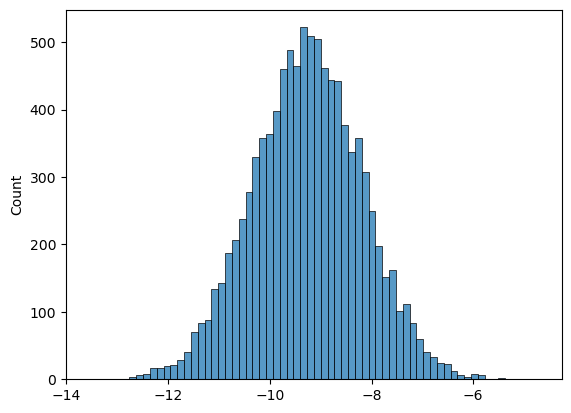

In [35]:
sns.histplot(estimates)
plt.show()

In [37]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(-11.38712966771791, -7.151428767311112)